In [0]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from scipy import stats
%matplotlib inline

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

## Preliminary Work
The most part of outlier detection, descriptive statistics and Verteilungen & Standardisierung has already been made in the Step EDA.

## Hypothesis Validation
The main part of this Notebook is, to validate the H0 and H1 and the additional Question. <br /><br />

In [1]:
# Read file into dataframe
df_tweets = pd.read_csv('../05_Feature Selection & Engineering/dataset_tweets_featured.csv', sep=',', encoding='utf-8')
print(df_tweets.shape)
df_tweets.head(5)

(64344, 22)


,interaction_id,tweet_id,senderuser_id,receiveruser_id,cyberbullying_type,interaction_timestamp,char_count,tweet_text,harass,cyberstalk,...,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,avg_word_length,avg_sentence_length,punctuation_count
0,1304,1510,876,2009,not_cyberbullying,41:34.9,20,@GYU WHAT IS THAT,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,2.800000,5.0,1
1,1998,31503,918,2436,other_cyberbullying,37:48.7,16,@STOCKPUTOUT YES,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,5.000000,3.0,1
2,2533,27942,1409,3624,other_cyberbullying,50:46.1,7,,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0
3,2598,52129,1341,3290,none,04:51.4,26,@BLACKAMAZON EXACTLY THIS,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,5.750000,4.0,1
4,3511,54626,831,2812,none,11:11.2,34,@ODDTANKOUT HTTP T CO KMMJEUME,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,4.333333,6.0,1


## Unpaired_two_sample_t-test

In [2]:
# Show categories of 'Type'
print(df_tweets['harass'].value_counts())

harass
0.0    61058
1.0     3285
Name: count, dtype: int64


/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


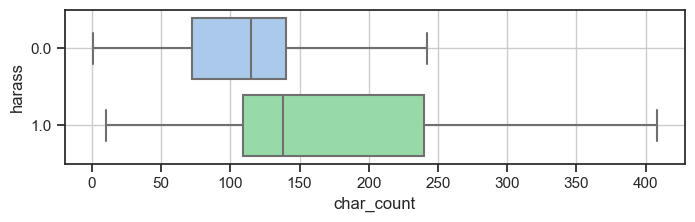

In [3]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="char_count",
                 y="harass",
                 palette=['b', 'g'],
                 data=df_tweets,
                 orient='h',
                 showfliers=False)

plt.grid()
plt.show()

### Unpaired two-sample t-test

In [4]:
 # Create subsets (groups)
not_harass = df_tweets.loc[df_tweets['harass'] == 0]
harass = df_tweets.loc[df_tweets['harass'] == 1]

# Create t-test
result = stats.ttest_ind(not_harass['char_count'], harass['char_count'])

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(5))

Test-statistic: -30.65969 p-value 0.0


### Interpretation of Result
**H0**: The amount of characters in tweets differs to a tweet that is labeled as 'harass' to one, that is labeled as 'not_harass'.
<br /><br />
**H1**:  The amount of characters in tweets **does not** differ to a tweet that is labeled as 'harass' to one, that is labeled as 'not_harass'. <br /><br />
Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the characteristic count of tweets and tweets classified as harrass or not_harass, differ. From the t-test above, it is not clear which type is higher or lower. It only shows that there is a statistically significant (5% significance level) difference.

## Additional Question

The following Graph shows, that a Sender is uniquely sending messages to 5 to 35 other people. </b>
For example, if a bar on the plot reaches a height of 100 at x=10, it means there are 100 senderuser_ids that interact with 10 unique receiveruser_ids.

In [5]:
# Plot Created from ChatGPT
# Create a DataFrame representing the frequency of unique sender-receiver pairs
# Count Pairs: List of messages between people. 
# The code looks at each pair of senders and receivers and counts how many messages they exchanged. 
# This information is stored in a table called sender_receiver_counts.
# Count Uniqueness: Now, for each sender, the code figures out how many different receivers they talked to. 
# It counts the unique receiver IDs for each sender.

Count Uniqueness: Now, for each sender, the code figures out how many different receivers they talked to. It counts the unique receiver IDs for each sender.
sender_receiver_counts = df_tweets.groupby(['senderuser_id', 'receiveruser_id']).size().reset_index(name='message_count')

# Count the number of unique receiveruser_ids each senderuser_id communicates with
unique_receiver_counts = sender_receiver_counts.groupby('senderuser_id')['receiveruser_id'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(unique_receiver_counts, bins=20, kde=False, color='skyblue')
plt.title('Number of Unique Receiveruser_ids for Each Senderuser_id')
plt.xlabel('Number of Unique Receiveruser_ids')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2754958159.py, line 9)

### Interactions
The following Code forms groups based on unique combinations of sender and receiver pairs. </b>
The Graph shows, that for each combination of 'senderuser_id' and 'receiveruser_id', there is only one interaction recorded in the dataset.

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


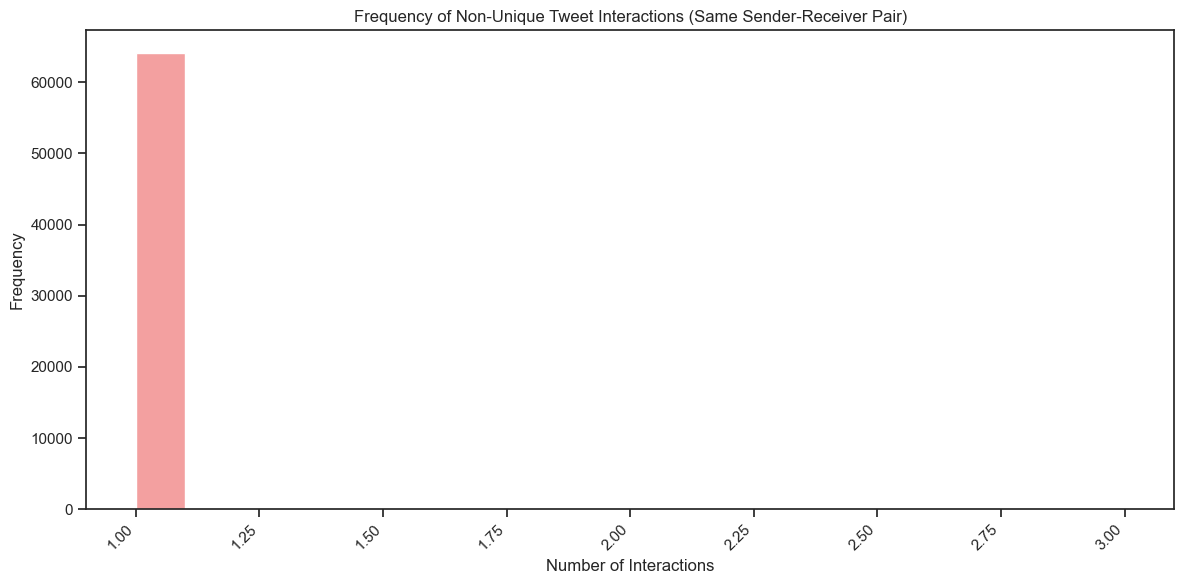

In [ ]:
# Plot Created from ChatGPT
# Create a DataFrame representing the frequency of each sender-receiver pair
sender_receiver_counts = df_tweets.groupby(['senderuser_id', 'receiveruser_id']).size().reset_index(name='message_count')

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(sender_receiver_counts['message_count'], bins=20, kde=False, color='lightcoral')
plt.title('Frequency of Non-Unique Tweet Interactions (Same Sender-Receiver Pair)')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conlusion

**Additional Question**: Is there evidence to suggest that the distribution of the number of unique receiveruser_ids for each senderuser_id follows a normal distribution, and is there any significant difference in the frequency of senderuser_ids based on the number of unique receiveruser_ids, indicating that the interaction patterns are evenly spread or normally distributed across the dataset?

- The distribution of the number of unique receiveruser_ids for each senderuser_id does not appear to follow a uniform or normal distribution
- Instead, it shows a skewed distribution where most senderuser_ids have a relatively low number of unique receiveruser_ids.
- The interaction patterns are not evenly spread across the dataset; rather, they are characterized by a concentration of senderuser_ids with a limited set of unique receiveruser_ids.